# Graph Maker for Mid-Term Data Structures and Algorithums


Author: Joshua Roberge

In [1]:
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uuid
from tqdm.notebook import tqdm


SAVE_LOCATION = "final_results.csv"
MAX_FIB = 500
MIN_FIB = 1

### Running and Gathering Results for C Implementation

In [ ]:
def get_c_fib(start:int, end:int) -> pd.DataFrame:
    """
    Runs the C implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        # Itterative
        result = subprocess.run(['../c_fib/main.out', '-a', '1','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))

        # Dynamic
        result = subprocess.run(['../c_fib/main.out', '-a', '3','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))

        # Recusive
        if i < 40:
            result = subprocess.run(['../c_fib/main.out', '-a', '2','-f',  str(i)], capture_output=True, text=True)
            results.append(result.stdout.strip().split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].str.replace("f_", "").astype(int)

    return df



for i in tqdm(range(1, 5), desc="Processing Fibonacci Rounds for C"):
    df = get_c_fib(MIN_FIB, MAX_FIB)
    df["Round"] = uuid.uuid4().hex ## using this as a pimrary key
    df["Language"] = "C"
    df = df[["Round", "Language", "Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]]
    df.to_csv(SAVE_LOCATION,
              mode='a',
              index=False, 
              header=not pd.io.common.file_exists(SAVE_LOCATION))

### Running and Gathering Results for Python Implementation

In [ ]:
def get_python_fib(start:int, end:int) -> pd.DataFrame:
    """
    Runs the C implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        # Itterative
        result = subprocess.run(['python3', '../python_fib/main.py', '-a', '1','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.replace("\n", "").split(","))

        # Dynamic
        result = subprocess.run(['python3', '../python_fib/main.py', '-a', '3','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.replace("\n", "").split(","))

        # Recusive
        if i < 25:
            result = subprocess.run(['python3', '../python_fib/main.py', '-a', '2','-f',  str(i)], capture_output=True, text=True)
            results.append(result.stdout.replace("\n", "").split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].str.replace("f_", "").astype(int)

    return df


for i in tqdm(range(1, 30), desc="Processing Fibonacci Rounds for C"):
    df = get_python_fib(MIN_FIB, MAX_FIB)
    df["Round"] = uuid.uuid4().hex ## using this as a pimrary key
    df["Language"] = "Python"
    df = df[["Round", "Language", "Fibonacci Number", "Implementation", "Time Elsaped", "Operation Count"]]
    df.to_csv(SAVE_LOCATION,
              mode='a',
              index=False, 
              header=not pd.io.common.file_exists(SAVE_LOCATION))

# Make Graphs

# C - Count, Time and Ranges

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load and clean data ===
df = pd.read_csv(SAVE_LOCATION)
df = df[df["Language"] == "C"]


# Fix column names and clean invalid values
df = df.rename(columns={"Time Elsaped": "Time (seconds)"})
df = df[(~df["Time (seconds)"].isna()) & (df["Time (seconds)"] > 0)]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].set_yscale('log')
axes[1].set_yscale('log')

df = df[(df["Operation Count"] < 100_000) & (df["Fibonacci Number"] <= 300)]

import seaborn as sns
sns.set_theme(style="darkgrid")



sns.lineplot(x="Fibonacci Number", y="Time (seconds)",
             hue="Implementation",
             data=df,
            ax=axes[0]
             )
sns.lineplot(data=df,
                x="Fibonacci Number",
                y="Operation Count",
                hue="Implementation",
                ax=axes[1])



axes[0].set_title("Fibonacci Time Complexity")
axes[0].set_xlabel("Fibonacci Number")
axes[0].set_ylabel("Log Time (seconds)")
axes[0].legend(title="Implementation")
axes[1].set_title("Fibonacci Operation Count")
axes[1].set_xlabel("Fibonacci Number")
axes[1].set_ylabel("Log Operation Count")
axes[1].legend(title="Implementation")
plt.suptitle('C Implementation of Fibonacci Algorithms', fontsize=16, fontweight='bold')
plt.savefig("graphs/c_fib_graphs.png", dpi=300, bbox_inches='tight')
plt.tight_layout()



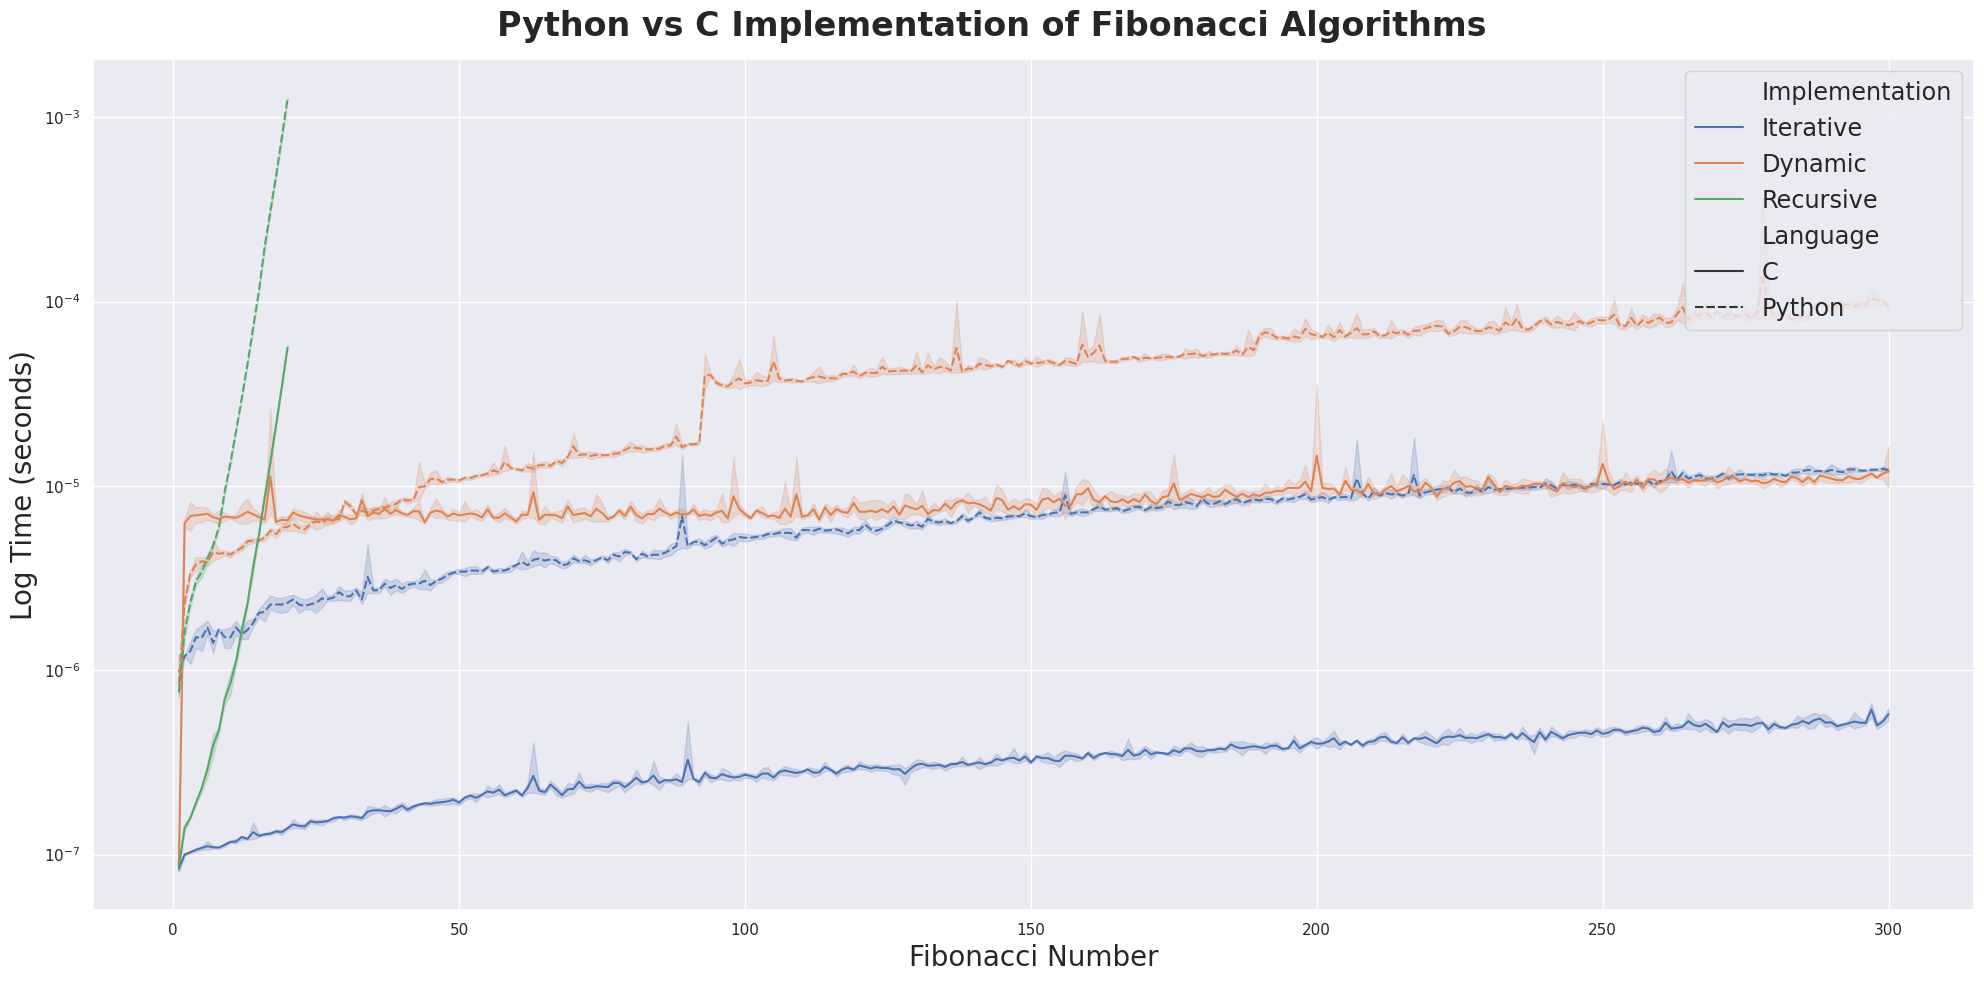

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load and clean data ===
df = pd.read_csv(SAVE_LOCATION)
# df = df[df["Language"] == "C"]


# Fix column names and clean invalid values
df = df.rename(columns={"Time Elsaped": "Time (seconds)"})
df = df[(~df["Time (seconds)"].isna()) & (df["Time (seconds)"] > 0)]




fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

axe.set_yscale('log')
axe.set_yscale('log')

df = df[(df["Operation Count"] < 100_000) & (df["Fibonacci Number"] <= 300)]

import seaborn as sns
sns.set_theme(style="darkgrid")



sns.lineplot(x="Fibonacci Number", y="Time (seconds)",
             hue="Implementation",
             data=df,
            ax=axe,
            style="Language",

             )


axe.set_xlabel("Fibonacci Number", fontsize=20)
axe.set_ylabel("Log Time (seconds)", fontsize=20)
axe.legend(fontsize='x-large', loc = 'upper right')

plt.suptitle('Python vs C Implementation of Fibonacci Algorithms', fontsize=24, fontweight='bold')
plt.savefig("graphs/python_vs_c.png", dpi=300, bbox_inches='tight')
plt.tight_layout()

